# Analysis of Selected Items under Politics

- Donald Trump 
- Hillary Clinton
- Fidel Castro
- Yuri on Ice 
- Spain
- Ruggero Pasquarelli

- What kind of users are contributing to the edits? (Anonymous, Bots, Registered)
- How many users are contributing to the different types of edits?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from datetime import datetime
from datetime import timezone

%matplotlib inline

In [21]:
# Reading revisions of the selected items
donald_trump = pd.read_csv('/Users/tushi/PRJ/WikidataParsing/topics/selected_items/politics/DonaldTrump_Q22686.csv')
yuri_on_ice = pd.read_csv('/Users/tushi/PRJ/WikidataParsing/topics/selected_items/movies/YuriOnIce_Q25104182.csv')
spain = pd.read_csv('/Users/tushi/PRJ/WikidataParsing/topics/selected_items/countries/Spain_Q29.csv')
ruggero_Pasquarelli = pd.read_csv('/Users/tushi/PRJ/WikidataParsing/topics/selected_items/music/RuggeroPasquarelli_Q4120122.csv')
hillary_clinton = pd.read_csv('/Users/tushi/PRJ/WikidataParsing/topics/selected_items/politics/HillaryClinton_Q6294.csv')
fidel_castro = pd.read_csv('/Users/tushi/PRJ/WikidataParsing/topics/selected_items/politics/FidelCastro_Q11256.csv')

# Donald Trump

In [3]:
print('No of Edits')
print(donald_trump['editscount'].iloc[0])
print('No of Users')
print(donald_trump['username'].nunique())

No of Edits
456
No of Users
122


In [4]:
donald_trump.groupby('usertype')['usertype'].count()

usertype
Anonymous       1
Bot            15
Registered    440
Name: usertype, dtype: int64

In [5]:
edits_per_user = donald_trump.groupby('username')['username'].count()

In [8]:
edits_per_user.describe()

count    122.000000
mean       3.737705
std       11.148734
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       95.000000
Name: username, dtype: float64

In [38]:
type_of_edits = donald_trump.groupby('type')['type'].count()

In [39]:
df_type_of_edits = pd.DataFrame({'type':type_of_edits.index, 'count':type_of_edits.values})

Text(0.5, 1.0, 'Types of Edits - Donald Trump (Q22686)')

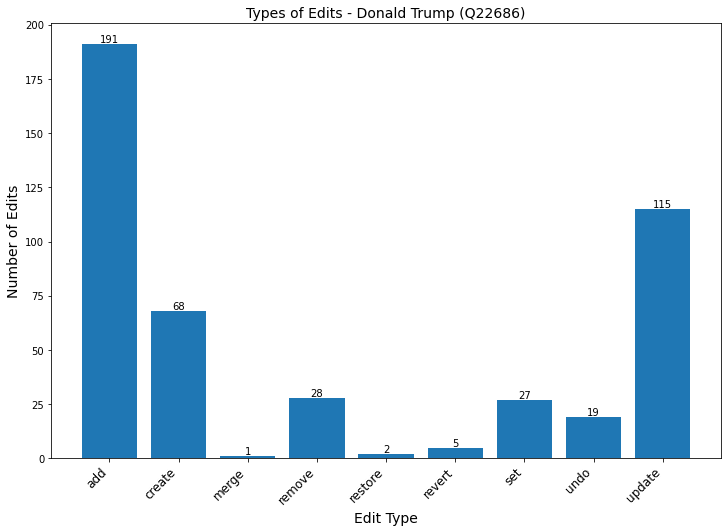

In [40]:
f, ax = plt.subplots(figsize=(12,8))

for i, r in enumerate(df_type_of_edits['count']):
    ax.text(i, r+0.75, str(r), horizontalalignment='center')
    
plt.bar(df_type_of_edits['type'], df_type_of_edits['count'])
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Edit Type", fontsize=14)
plt.ylabel("Number of Edits", fontsize=14)
plt.title("Types of Edits - Donald Trump (Q22686)", fontsize=14)

In [41]:
adds = donald_trump[donald_trump['type'] == 'add']
creates = donald_trump[donald_trump['type'] == 'create']
merges = donald_trump[donald_trump['type'] == 'merge']
removes = donald_trump[donald_trump['type'] == 'remove']
restores = donald_trump[donald_trump['type'] == 'restore']
reverts = donald_trump[donald_trump['type'] == 'revert']
sets = donald_trump[donald_trump['type'] == 'set']
undos = donald_trump[donald_trump['type'] == 'undo']
updates = donald_trump[donald_trump['type'] == 'update']

In [42]:
users_add = adds['username'].nunique()
users_create = creates['username'].nunique()
users_merge = merges['username'].nunique()
users_remove = removes['username'].nunique()
users_restore = restores['username'].nunique()
users_revert = reverts['username'].nunique()
users_set = sets['username'].nunique()
users_undo = undos['username'].nunique()
users_update = updates['username'].nunique()

In [43]:
no_of_users_per_type = {'type':['add', 'create', 'merge', 'remove', 'restore', 'revert', 'set', 'undo', 'update'],
                       'no_of_users':[users_add, users_create, users_merge, users_remove, users_restore, users_revert, users_set, users_undo, users_update]}

In [44]:
df = pd.DataFrame(no_of_users_per_type)
print(df)

      type  no_of_users
0      add           66
1   create           23
2    merge            1
3   remove           20
4  restore            2
5   revert            1
6      set           17
7     undo            5
8   update           37


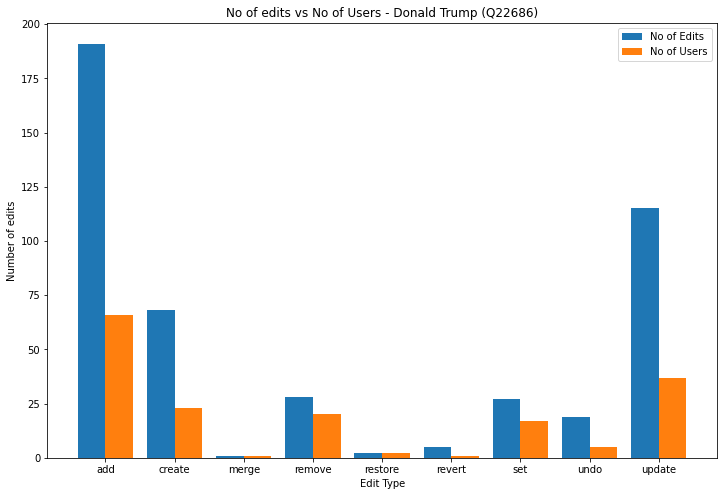

In [45]:
# Visualising all proxies
f, ax = plt.subplots(figsize=(12,8))
edit_type = ['add', 'create', 'merge', 'remove', 'restore', 'revert', 'set', 'undo', 'update']
edit_count = df_type_of_edits['count'].values
user_count = df['no_of_users'].values
  
x_axis = np.arange(len(edit_type))
  
plt.bar(x_axis - 0.2, edit_count, 0.4, label = 'No of Edits')
plt.bar(x_axis + 0.2, user_count, 0.4, label = 'No of Users')
  
plt.xticks(x_axis, edit_type)
plt.xlabel("Edit Type")
plt.ylabel("Number of edits")
plt.title("No of edits vs No of Users - Donald Trump (Q22686)")
plt.legend()
plt.show()

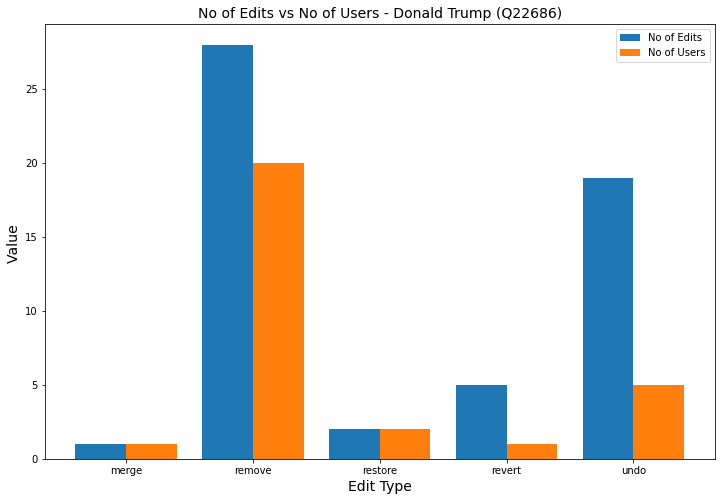

In [15]:
# Visualising controversial proxies
f, ax = plt.subplots(figsize=(12,8))
edit_type = ['merge', 'remove', 'restore', 'revert', 'undo']
c_edit_count = [1, 28, 2, 5, 19]
c_user_count = [users_merge, users_remove, users_restore, users_revert, users_undo]
  
x_axis = np.arange(len(edit_type))
  
plt.bar(x_axis - 0.2, c_edit_count, 0.4, label = 'No of Edits')
plt.bar(x_axis + 0.2, c_user_count, 0.4, label = 'No of Users')
  
plt.xticks(x_axis, edit_type)
plt.xlabel("Edit Type", fontsize = 14)
plt.ylabel("Value ", fontsize = 14)
plt.title("No of Edits vs No of Users - Donald Trump (Q22686)", fontsize = 14)
plt.legend()
plt.show()

# Yuri On Ice

In [9]:
print('No of Edits')
print(yuri_on_ice['editscount'].iloc[0])
print('No of Users')
print(yuri_on_ice['username'].nunique())

No of Edits
108
No of Users
20


In [10]:
yuri_on_ice.groupby('usertype')['usertype'].count()

usertype
Anonymous     62
Bot            6
Registered    40
Name: usertype, dtype: int64

In [11]:
edits_per_user = yuri_on_ice.groupby('username')['username'].count()

In [12]:
edits_per_user.describe()

count    20.000000
mean      5.400000
std      13.476686
min       1.000000
25%       1.000000
50%       1.500000
75%       3.500000
max      62.000000
Name: username, dtype: float64

# Spain

In [13]:
print('No of Edits')
print(spain['editscount'].iloc[0])
print('No of Users')
print(spain['username'].nunique())

No of Edits
130
No of Users
37


In [14]:
spain.groupby('usertype')['usertype'].count()

usertype
Anonymous     25
Bot           10
Registered    95
Name: usertype, dtype: int64

In [15]:
edits_per_user = spain.groupby('username')['username'].count()

In [16]:
edits_per_user.describe()

count    37.000000
mean      3.513514
std       4.879786
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max      25.000000
Name: username, dtype: float64

# Ruggero Pasquarelli

In [17]:
print('No of Edits')
print(ruggero_Pasquarelli['editscount'].iloc[0])
print('No of Users')
print(ruggero_Pasquarelli['username'].nunique())

No of Edits
100
No of Users
10


In [18]:
ruggero_Pasquarelli.groupby('usertype')['usertype'].count()

usertype
Anonymous     66
Bot            1
Registered    33
Name: usertype, dtype: int64

In [19]:
edits_per_user = ruggero_Pasquarelli.groupby('username')['username'].count()

In [20]:
edits_per_user.describe()

count    10.000000
mean     10.000000
std      20.319668
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max      66.000000
Name: username, dtype: float64

# Hillary Clinton

In [22]:
print('No of Edits')
print(hillary_clinton['editscount'].iloc[0])
print('No of Users')
print(hillary_clinton['username'].nunique())

No of Edits
199
No of Users
52


In [23]:
hillary_clinton.groupby('usertype')['usertype'].count()

usertype
Anonymous      37
Bot            10
Registered    152
Name: usertype, dtype: int64

In [24]:
edits_per_user = hillary_clinton.groupby('username')['username'].count()

In [25]:
edits_per_user.describe()

count    52.000000
mean      3.826923
std       7.511354
min       1.000000
25%       1.000000
50%       1.000000
75%       2.250000
max      39.000000
Name: username, dtype: float64

# Fidel Castro

In [26]:
print('No of Edits')
print(fidel_castro['editscount'].iloc[0])
print('No of Users')
print(fidel_castro['username'].nunique())

No of Edits
164
No of Users
51


In [27]:
fidel_castro.groupby('usertype')['usertype'].count()

usertype
Anonymous     67
Bot            8
Registered    89
Name: usertype, dtype: int64

In [28]:
edits_per_user = fidel_castro.groupby('username')['username'].count()

In [29]:
edits_per_user.describe()

count    51.000000
mean      3.215686
std       9.291531
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      67.000000
Name: username, dtype: float64

In [37]:
# Additional - Attempt at using timestamp to analyse
# Highest Number of Edits for Donald Trump was on 9th November, 2016
# Day of 2016 US Election Result

In [31]:
donald_trump['timestamp'] = pd.to_datetime(donald_trump.timestamp, format='%Y-%m-%d %H:%M:%S')

In [33]:
donald_trump['day/month'] = donald_trump['timestamp'].apply(lambda x: "%d/%d" % (x.day, x.month))

In [34]:
edits_by_days = donald_trump.groupby(['day/month']).size()

In [35]:
edits_by_days.head

<bound method NDFrame.head of day/month
1/11       6
1/12       3
10/11     19
11/10      1
11/11     12
11/12      2
12/11     23
13/11      6
13/12      5
14/10      4
14/11     13
15/11     17
16/10      1
16/11      6
17/10      9
17/11      4
17/12      1
18/11      2
19/10      2
19/11      1
2/10       1
2/11       3
20/10      1
20/11      6
21/11      5
22/10      1
22/11      2
23/10      1
23/11      1
23/12      3
24/10      1
24/11      1
24/12      1
25/11      3
26/11      1
27/12      1
29/10      1
29/12     25
3/10       1
3/11       1
3/12       2
4/10       4
4/12       1
5/10       2
5/11       2
6/11       1
7/11      16
7/12       5
8/11      54
9/10      11
9/11     161
dtype: int64>